### MNIST - CNN

In [2]:
##############################################################
# 16-3 MNIST : Deep 코드  (28분 소요)
##############################################################
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# (N, 28, 28, 1)로 3차원 데이터로 만들어 주어야 함 + 0~1 Minmax 정규
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
X_train.shape, X_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
# 원핫 인코딩
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

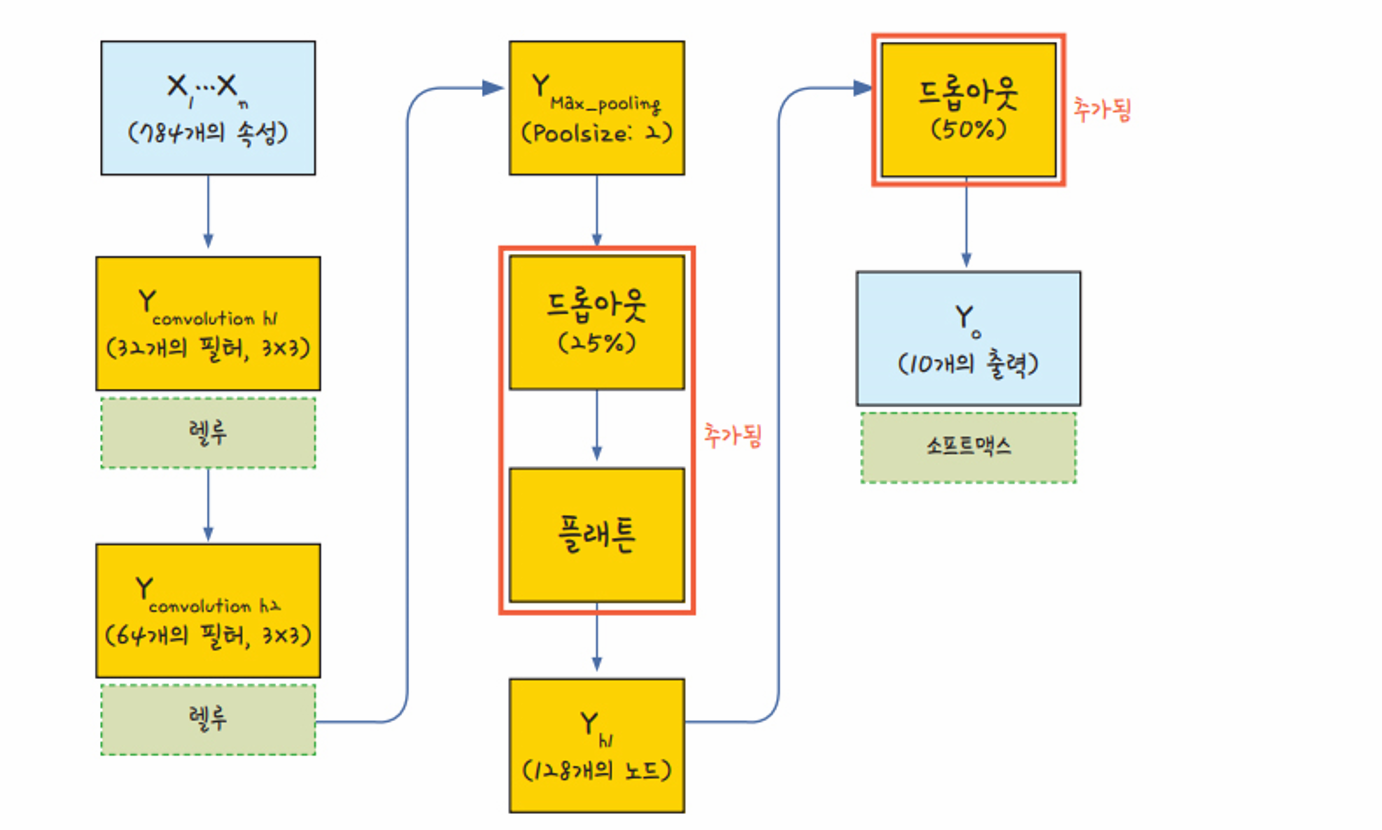

In [5]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

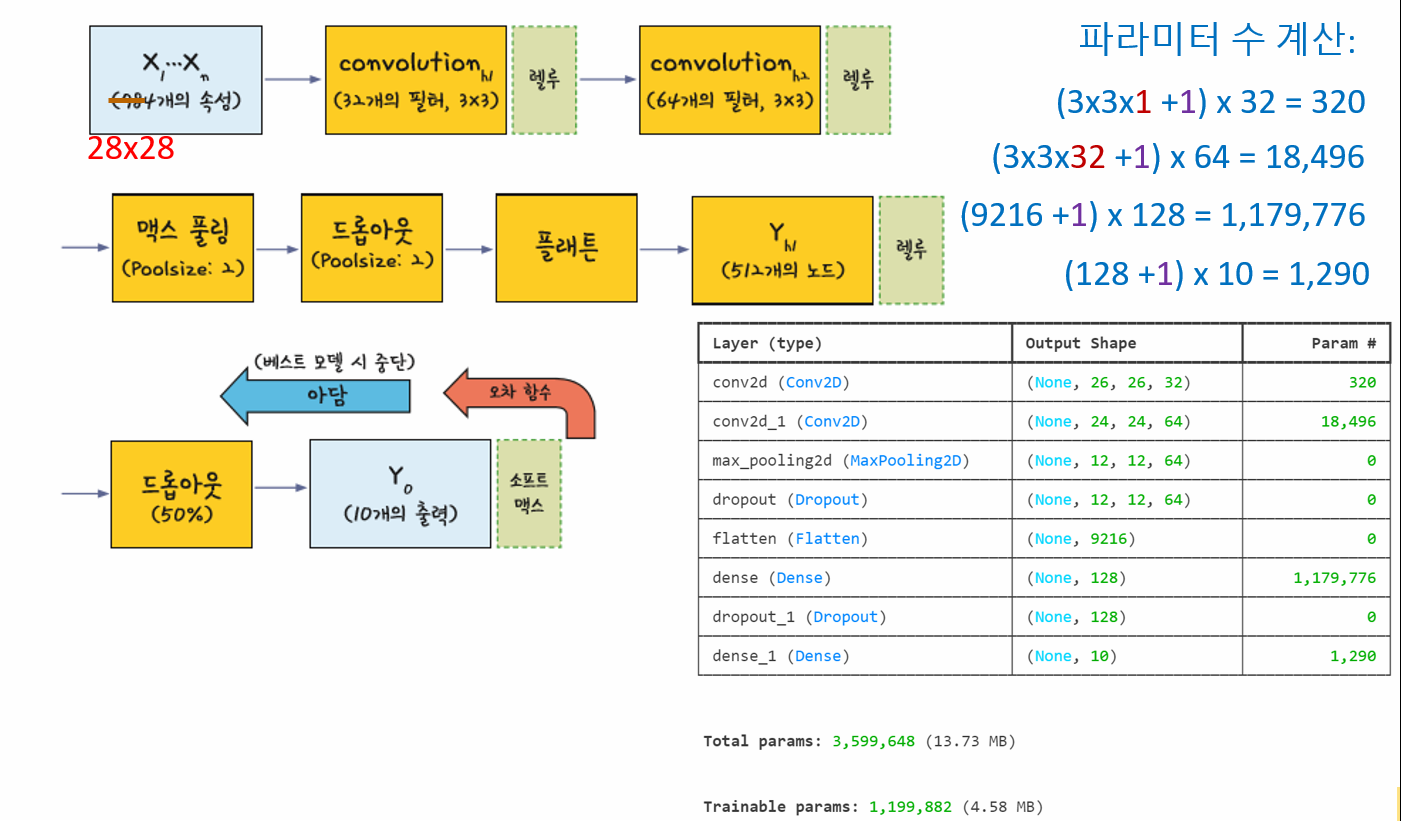

## MNIST Deep - CNN 활용

d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30

Epoch 1: val_loss improved from None to 0.04760, saving model to ../model/mnist_cnn_model.keras
1200/1200 - 288s - 240ms/step - accuracy: 0.9405 - loss: 0.1974 - val_accuracy: 0.9849 - val_loss: 0.0476
Epoch 2/30

Epoch 2: val_loss improved from 0.04760 to 0.03332, saving model to ../model/mnist_cnn_model.keras
1200/1200 - 269s - 224ms/step - accuracy: 0.9761 - loss: 0.0817 - val_accuracy: 0.9883 - val_loss: 0.0333
Epoch 3/30

Epoch 3: val_loss improved from 0.03332 to 0.02927, saving model to ../model/mnist_cnn_model.keras
1200/1200 - 207s - 173ms/step - accuracy: 0.9819 - loss: 0.0604 - val_accuracy: 0.9892 - val_loss: 0.0293
Epoch 4/30

Epoch 4: val_loss did not improve from 0.02927
1200/1200 - 201s - 168ms/step - accuracy: 0.9845 - loss: 0.0502 - val_accuracy: 0.9900 - val_loss: 0.0316
Epoch 5/30

Epoch 5: val_loss did not improve from 0.02927
1200/1200 - 188s - 157ms/step - accuracy: 0.9866 - loss: 0.0433 - val_accuracy: 0.9899 - val_loss: 0.0335
Epoch 6/30

Epoch 6: v

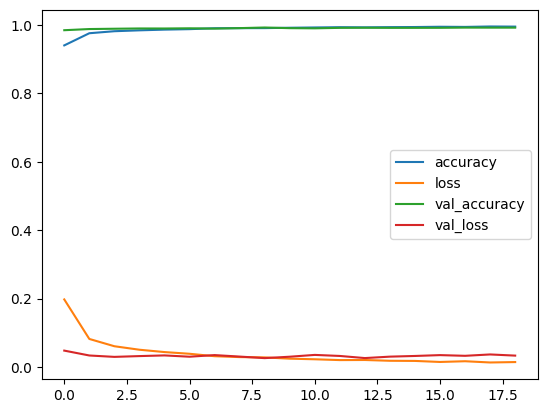

CPU times: total: 4h 38min 58s
Wall time: 1h 3min 25s


In [6]:
%%time
# CPU times: total: 1h 12min 5s
# Wall time: 19min 31s
##############################################################
# 16-3 MNIST : Deep 코드  (28분 소요)
##############################################################
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = '../data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="../model/mnist_cnn_model.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=50, verbose=2,            ## verbose=0? 2?
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프 그리기
pd.DataFrame(history.history).plot()
plt.show()

In [174]:
##############################################################
# 16-3 MNIST : Deep 코드  (?분 소요) - 풀어보기
##############################################################
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [175]:
12*12*64

9216

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=50, verbose=2,            ## verbose=0? 2?
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

pd.DataFrame(history.history).plot()
plt.show()

In [177]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

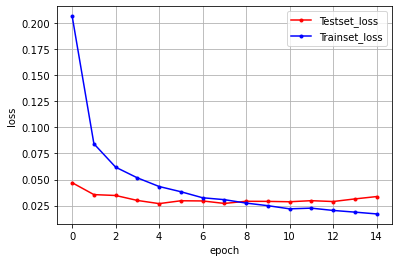

In [51]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
# x_len = np.arange(history.history['loss'])
plt.plot(history.history['val_loss'], marker='.', c="red", label='Testset_loss')
plt.plot(history.history['loss'], marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [182]:
X_test.shape

(10000, 28, 28, 1)

In [186]:
model.predict(X_test[0:1]) 
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

array([[2.8111387e-20, 5.8234050e-14, 1.2312757e-13, 2.4536959e-13,
        6.0666458e-17, 1.1920026e-18, 3.8367411e-23, 1.0000000e+00,
        2.1919696e-17, 3.3923012e-14]], dtype=float32)

@@@ 오답 @@@
Y값 9 != 예측값 4


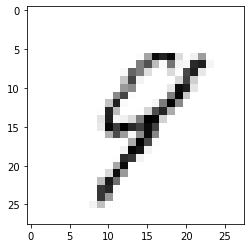

@@@ 오답 @@@
Y값 2 != 예측값 7


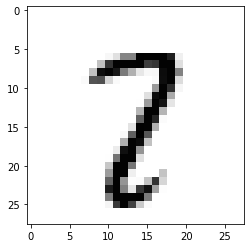

@@@ 오답 @@@
Y값 5 != 예측값 3


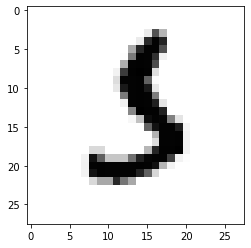

@@@ 오답 @@@
Y값 6 != 예측값 0


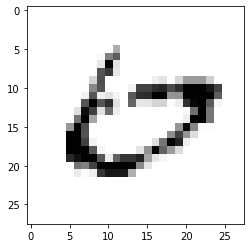

@@@ 오답 @@@
Y값 8 != 예측값 0


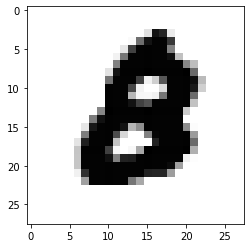

@@@ 오답 @@@
Y값 5 != 예측값 3


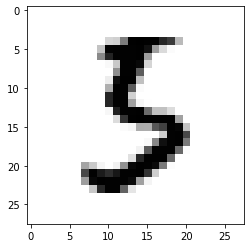

@@@ 오답 @@@
Y값 3 != 예측값 5


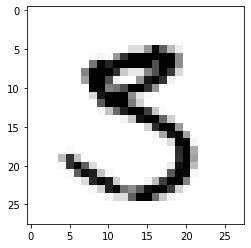

@@@ 오답 @@@
Y값 6 != 예측값 5


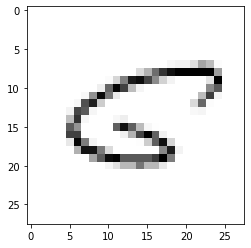

@@@ 오답 @@@
Y값 8 != 예측값 1


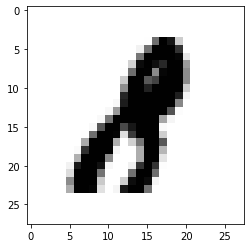

@@@ 오답 @@@
Y값 4 != 예측값 6


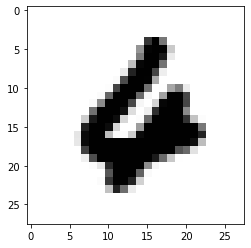

@@@ 오답 @@@
Y값 7 != 예측값 2


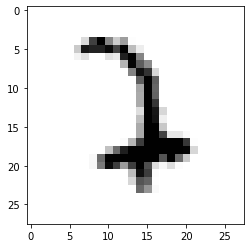

@@@ 오답 @@@
Y값 9 != 예측값 4


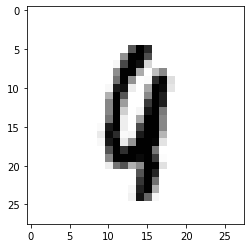

@@@ 오답 @@@
Y값 4 != 예측값 9


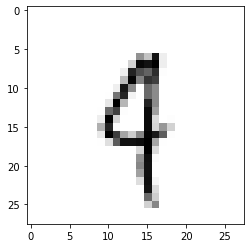

@@@ 오답 @@@
Y값 7 != 예측값 1


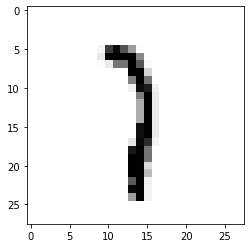

@@@ 오답 @@@
Y값 7 != 예측값 2


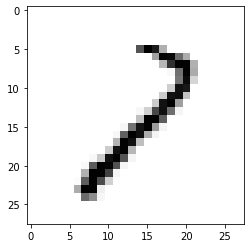

@@@ 오답 @@@
Y값 5 != 예측값 3


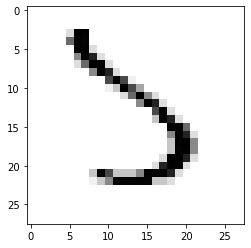

@@@ 오답 @@@
Y값 9 != 예측값 7


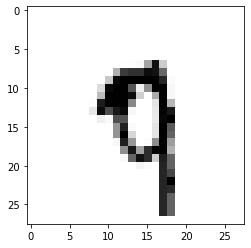

@@@ 오답 @@@
Y값 8 != 예측값 7


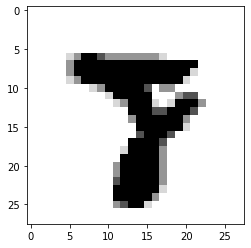

@@@ 오답 @@@
Y값 9 != 예측값 4


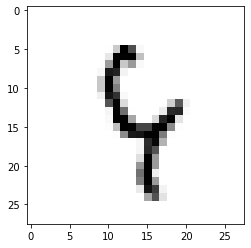

@@@ 오답 @@@
Y값 6 != 예측값 0


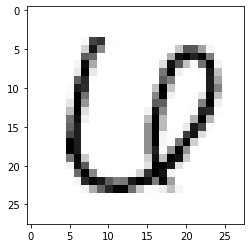

@@@ 오답 @@@
Y값 4 != 예측값 9


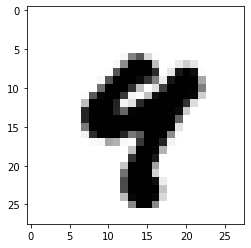

@@@ 오답 @@@
Y값 6 != 예측값 1


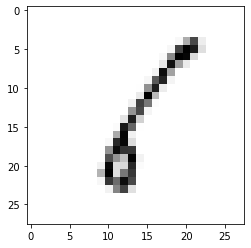

@@@ 오답 @@@
Y값 9 != 예측값 0


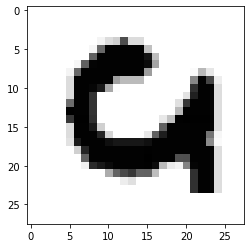

@@@ 오답 @@@
Y값 9 != 예측값 4


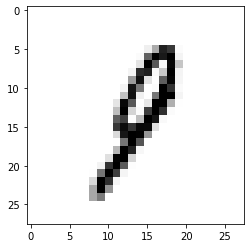

@@@ 오답 @@@
Y값 9 != 예측값 4


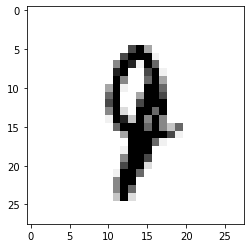

@@@ 오답 @@@
Y값 2 != 예측값 0


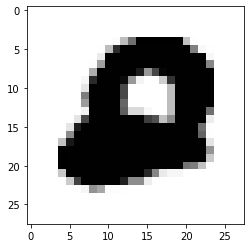

@@@ 오답 @@@
Y값 2 != 예측값 4


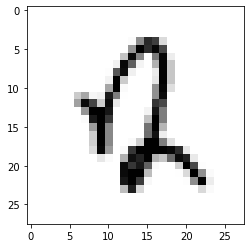

@@@ 오답 @@@
Y값 5 != 예측값 3


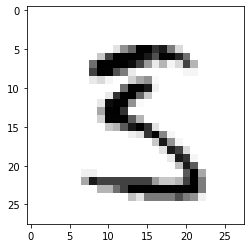

@@@ 오답 @@@
Y값 6 != 예측값 1


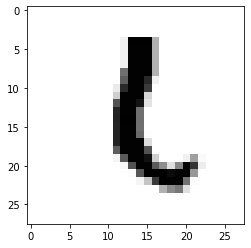

@@@ 오답 @@@
Y값 8 != 예측값 0


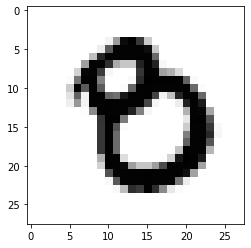

@@@ 오답 @@@
Y값 6 != 예측값 0


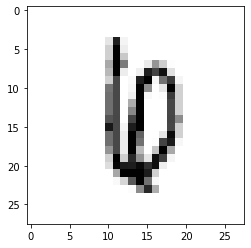

@@@ 오답 @@@
Y값 1 != 예측값 2


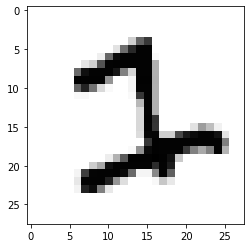

@@@ 오답 @@@
Y값 6 != 예측값 0


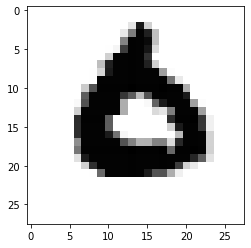

@@@ 오답 @@@
Y값 7 != 예측값 2


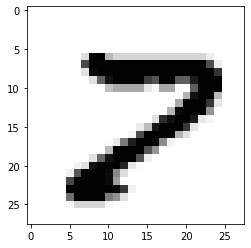

@@@ 오답 @@@
Y값 6 != 예측값 4


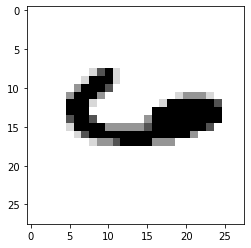

@@@ 오답 @@@
Y값 7 != 예측값 2


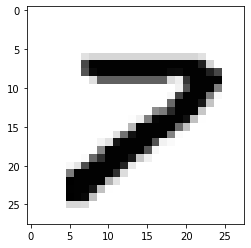

@@@ 오답 @@@
Y값 5 != 예측값 0


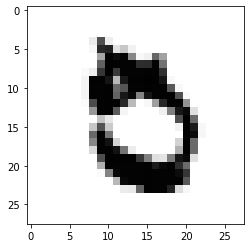

@@@ 오답 @@@
Y값 8 != 예측값 9


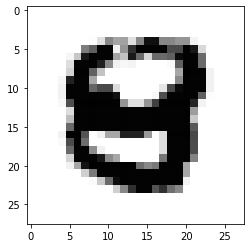

@@@ 오답 @@@
Y값 7 != 예측값 2


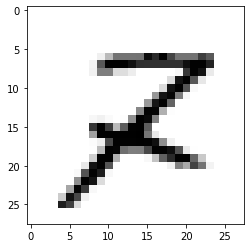

@@@ 오답 @@@
Y값 7 != 예측값 8


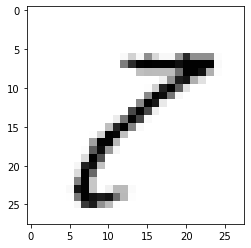

@@@ 오답 @@@
Y값 6 != 예측값 8


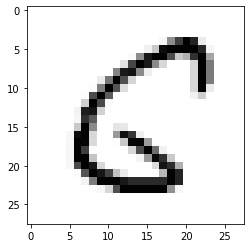

@@@ 오답 @@@
Y값 9 != 예측값 0


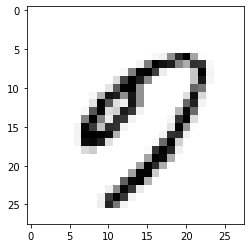

@@@ 오답 @@@
Y값 2 != 예측값 7


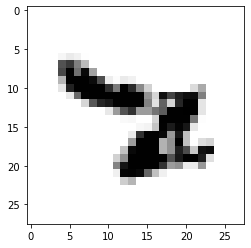

@@@ 오답 @@@
Y값 1 != 예측값 7


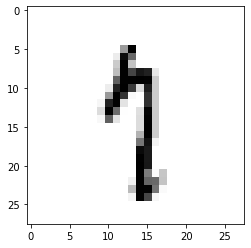

@@@ 오답 @@@
Y값 2 != 예측값 1


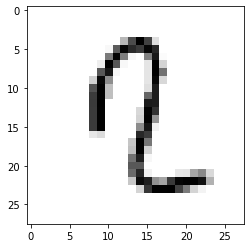

@@@ 오답 @@@
Y값 2 != 예측값 7


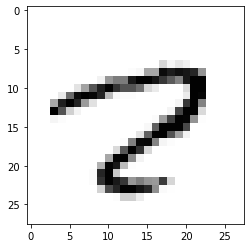

@@@ 오답 @@@
Y값 9 != 예측값 4


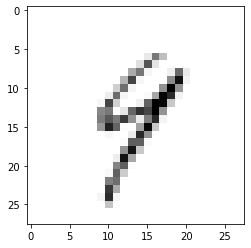

@@@ 오답 @@@
Y값 6 != 예측값 0


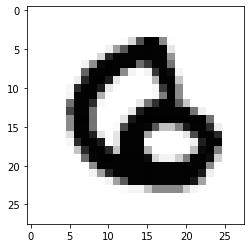

@@@ 오답 @@@
Y값 3 != 예측값 5


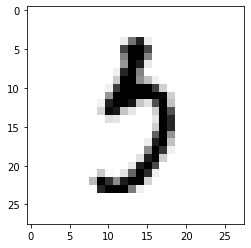

@@@ 오답 @@@
Y값 9 != 예측값 8


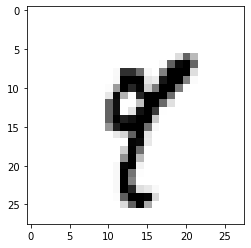

@@@ 오답 @@@
Y값 8 != 예측값 0


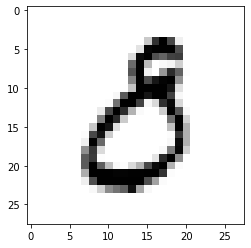

@@@ 오답 @@@
Y값 9 != 예측값 4


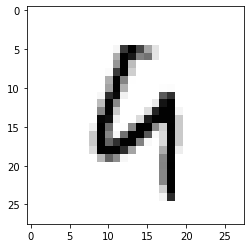

@@@ 오답 @@@
Y값 7 != 예측값 2


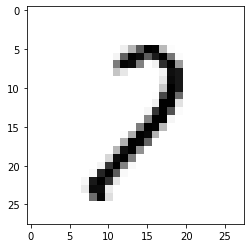

@@@ 오답 @@@
Y값 1 != 예측값 6


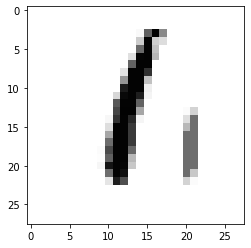

@@@ 오답 @@@
Y값 4 != 예측값 0


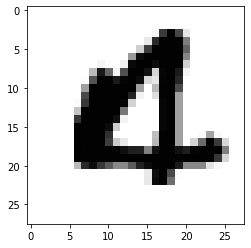

@@@ 오답 @@@
Y값 5 != 예측값 3


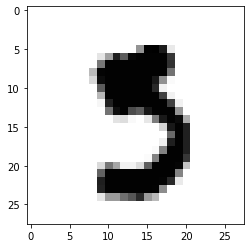

@@@ 오답 @@@
Y값 3 != 예측값 8


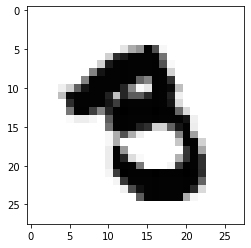

@@@ 오답 @@@
Y값 9 != 예측값 5


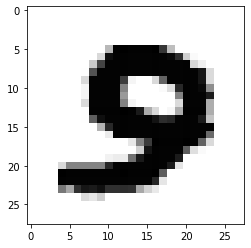

@@@ 오답 @@@
Y값 9 != 예측값 5


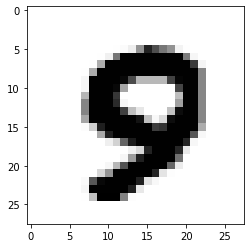

@@@ 오답 @@@
Y값 9 != 예측값 5


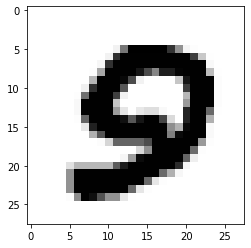

@@@ 오답 @@@
Y값 9 != 예측값 8


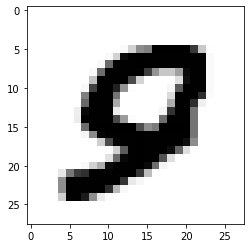

@@@ 오답 @@@
Y값 9 != 예측값 5


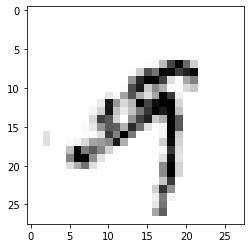

@@@ 오답 @@@
Y값 9 != 예측값 7


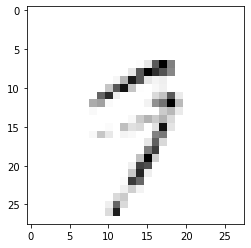

@@@ 오답 @@@
Y값 7 != 예측값 1


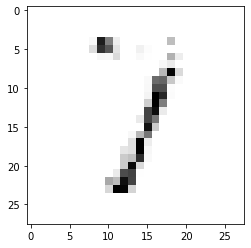

@@@ 오답 @@@
Y값 0 != 예측값 9


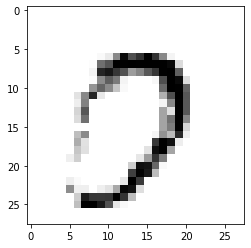

@@@ 오답 @@@
Y값 8 != 예측값 2


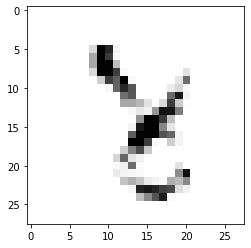

@@@ 오답 @@@
Y값 2 != 예측값 1


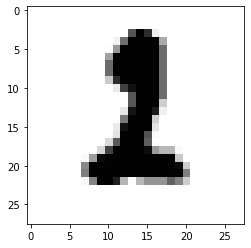

@@@ 오답 @@@
Y값 7 != 예측값 2


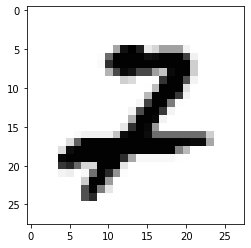

@@@ 오답 @@@
Y값 7 != 예측값 2


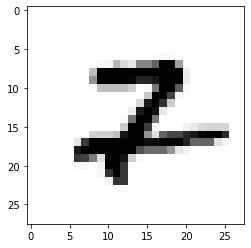

@@@ 오답 @@@
Y값 7 != 예측값 2


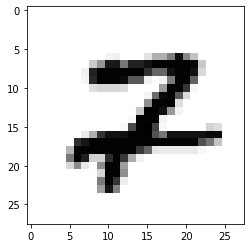

@@@ 오답 @@@
Y값 7 != 예측값 2


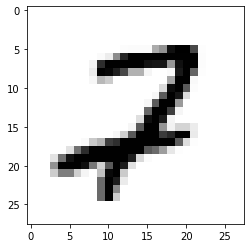

@@@ 오답 @@@
Y값 9 != 예측값 7


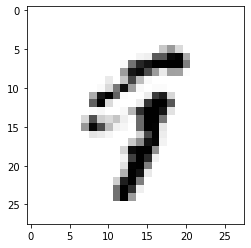

@@@ 오답 @@@
Y값 9 != 예측값 7


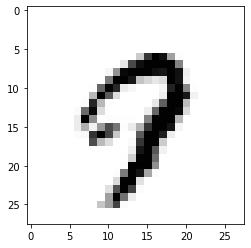

@@@ 오답 @@@
Y값 9 != 예측값 7


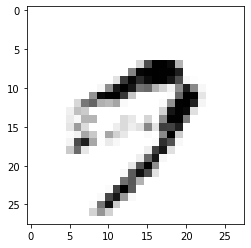

@@@ 오답 @@@
Y값 2 != 예측값 7


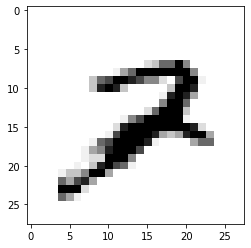

@@@ 오답 @@@
Y값 9 != 예측값 7


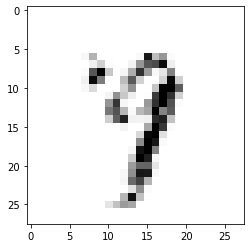

@@@ 오답 @@@
Y값 5 != 예측값 6


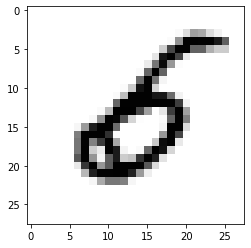

In [187]:
#############################################################
# Test data 중 오답 print
#############################################################
for i in range(len(X_test)):
    predicted = model.predict(X_test[i:i+1]).argmax()
    if Y_test[i].argmax() != predicted:
        print("@@@ 오답 @@@")
        print(f"Y값 {Y_test[i].argmax()} != 예측값 {predicted}")
        plt.imshow(X_test[i].reshape(28, 28), cmap='Greys' )  
        plt.show()